# THE BATTLE OF NEIGHBORHOODS

## Understanding the neighborhoods of Delhi

## 1. Introduction

### 1.1 Background

Delhi, officially the National Capital Territory of Delhi (NCT), is a city and a union territory of India containing New Delhi, the capital of India. The NCT covers an area of 1,484 square kilometres (573 sq mi). According to the 2011 census, Delhi's city proper population was over 11 million, the second-highest in India after Mumbai, while the whole NCT's population was about 16.8 million. 

Delhi's urban area is now considered to extend beyond the NCT boundaries, and include the neighbouring satellite cities of Ghaziabad, Faridabad, Gurgaon and Noida in an area now called National Capital Region (NCR) and had an estimated 2016 population of over 26 million people, making it the world's second-largest urban area according to the United Nations.

Delhi is the second-wealthiest city in India after Mumbai and is home to 18 billionaires and 23,000 millionaires. Delhi ranks fifth among the Indian states and union territories in human development index. Delhi has the second-highest GDP per capita in India. It is one of the world's most polluted cities by particulate matter concentration.

### 1.2 Business Problem

This project will take a deeper look into the essence of this city which is known for its history, heritage, authentic food and diverse culture. We will explore the districts of Delhi by segmenting and clustering the districts based on its popular venues.

This project will provide in detail analysis and visualisations at-a-glance to understand the different districts as well as different neighborhoods of each district.


## 2. Data

### 2.1 Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import geopy
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
from sklearn.cluster import KMeans
%matplotlib inline
print('Libraries imported!')

Libraries imported!


In [41]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighbourhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
4,North West Delhi,Begum Pur,28.723900,77.060900


In [3]:
df.shape

(185, 4)

In [4]:
df.Borough.value_counts()

South Delhi         49
North Delhi         27
South West Delhi    21
West Delhi          20
East Delhi          19
North West Delhi    18
North East Delhi    13
New Delhi           10
Central Delhi        8
Name: Borough, dtype: int64

In [5]:
address = 'Delhi, IN'

geolocator = Nominatim(user_agent='DL_locator')
location = geolocator.geocode(address)
latitude_DL = location.latitude
longitude_DL = location.longitude
print('The Latitude and Longitude of Delhi are {} and {}'.format(latitude_DL, longitude_DL))

The Latitude and Longitude of Delhi are 28.6517178 and 77.2219388


In [6]:
map_DL = folium.Map(location=[latitude_DL, longitude_DL], zoom_start=10)

In [7]:
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['Borough'], df['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_DL)  

map_DL

In [142]:
CLIENT_ID = '153AJARQDUKXH2SA2SFU2ANNSH0H3TWQKE0FQEXDH0J5MQOU' # your Foursquare ID
CLIENT_SECRET = 'KHZ1JYV5H25AJWRPU4SSBWVEDU1WM3LA2SQZW3MKDW40YUDC' # your Foursquare Secret
VERSION = '20191231' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 153AJARQDUKXH2SA2SFU2ANNSH0H3TWQKE0FQEXDH0J5MQOU
CLIENT_SECRET:KHZ1JYV5H25AJWRPU4SSBWVEDU1WM3LA2SQZW3MKDW40YUDC


In [143]:
LIMIT = 500
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT)
        
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [145]:
DL_venues = getNearbyVenues(names=df['Neighbourhood'],
                           latitudes = df['latitude'],
                           longitudes = df['longitude'])

Adarsh Nagar


KeyError: 'groups'

In [ ]:
DL_venues.head()

In [17]:
Neighborhood_counts = DL_venues.groupby('Neighbourhood').count()
Neighborhood_counts.head(10)

,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Adarsh Nagar,2,2,2,2,2,2,2
Alaknanda,0,11,11,11,11,11,11
Anand Vihar,0,8,8,8,8,8,8
Ashok Nagar,0,4,4,4,4,4,4
Ashok Vihar,4,4,4,4,4,4,4
Azadpur,3,3,3,3,3,3,3
Babarpur,0,3,3,3,3,3,3
Badarpur,0,2,2,2,2,2,2
Bali Nagar,0,8,8,8,8,8,8


In [146]:
data = DL_venues
data = data.insert(1, 'Borough', df['Borough'])

ValueError: cannot insert Borough, already exists

In [22]:
data.head()

,Neighbourhood,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,North West Delhi,28.614192,77.071541,Wordsworth Bookstore,28.611429,77.069148,Bookstore
1,Adarsh Nagar,North West Delhi,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,Ashok Vihar,North West Delhi,28.699453,77.184826,ELIXIR FERTILITY CENTRE,28.700034,77.188093,Health & Beauty Service
3,Ashok Vihar,North West Delhi,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery
4,Ashok Vihar,North West Delhi,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner


In [23]:
Borough_counts = data.groupby('Borough').count().reset_index()
Borough_counts

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Delhi,8,8,8,8,8,8,8
1,East Delhi,19,19,19,19,19,19,19
2,New Delhi,10,10,10,10,10,10,10
3,North Delhi,27,27,27,27,27,27,27
4,North East Delhi,13,13,13,13,13,13,13
5,North West Delhi,18,18,18,18,18,18,18
6,South Delhi,49,49,49,49,49,49,49
7,South West Delhi,21,21,21,21,21,21,21
8,West Delhi,20,20,20,20,20,20,20


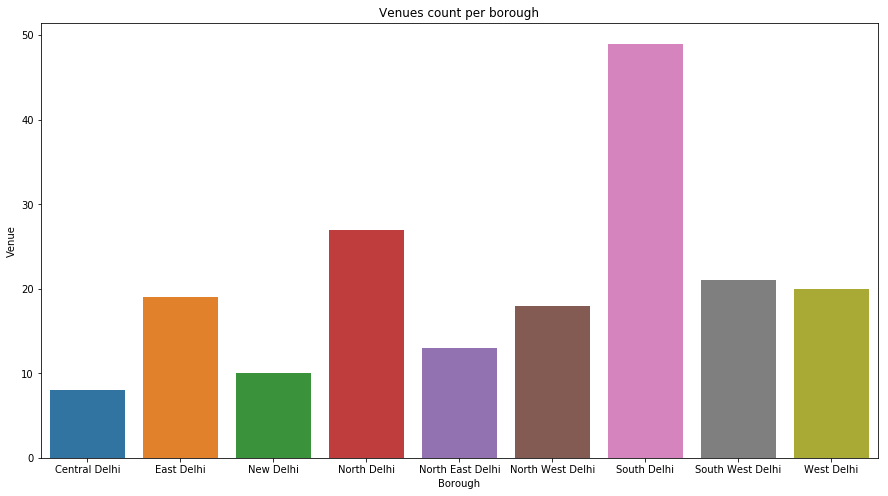

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x=Borough_counts.Borough, y=Borough_counts.Venue, data=Borough_counts)
plt.title('Venues count per borough')
plt.show()

In [25]:
DL_onehot = pd.get_dummies(DL_venues[['Venue Category']], prefix="", prefix_sep="")
DL_onehot['Neighbourhood']= DL_venues['Neighbourhood']
DL_onehot.head()

,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Astrologer,...,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Weight Loss Center,Wine Bar,Women's Store,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adarsh Nagar
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adarsh Nagar
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ashok Vihar


In [114]:
DL_grouped = DL_onehot.groupby('Neighbourhood').mean().reset_index()
DL_grouped = DL_grouped.round(2)
DL_grouped

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,...,Tourist Information Center,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Weight Loss Center,Wine Bar,Women's Store
0,Adarsh Nagar,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
1,Alaknanda,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2,Anand Vihar,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
3,Ashok Nagar,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
4,Ashok Vihar,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
5,Azadpur,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
6,Babarpur,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
7,Badarpur,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.50,0.0,0.00,0.0,0.0,0.00,0.00
8,Bali Nagar,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
9,Bara Hindu Rao,0.25,0.0,0.5,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00


In [115]:
num_top_venues = 5

for hood in DL_grouped['Neighbourhood']:
    print('--------'+ hood + '---------')
    temp = DL_grouped[DL_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns=['VENUE', 'FREQ']
    temp = temp.iloc[1:]
    temp['FREQ'] = temp['FREQ'].astype(float)
    temp = temp.round({'FREQ': 2})
    print(temp.sort_values('FREQ', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

--------Adarsh Nagar---------
               VENUE  FREQ
0          Bookstore   0.5
1  Indian Restaurant   0.5
2       Outlet Store   0.0
3             Museum   0.0
4        Music Store   0.0


--------Alaknanda---------
                     VENUE  FREQ
0                BBQ Joint  0.18
1        Indian Restaurant  0.18
2  New American Restaurant  0.09
3              Pizza Place  0.09
4        Food & Drink Shop  0.09


--------Anand Vihar---------
                VENUE  FREQ
0   Indian Restaurant  0.25
1          Soup Place  0.12
2         Pizza Place  0.12
3  Punjabi Restaurant  0.12
4   Indian Sweet Shop  0.12


--------Ashok Nagar---------
                  VENUE  FREQ
0         Metro Station  0.50
1  Fast Food Restaurant  0.25
2        Ice Cream Shop  0.25
3                   ATM  0.00
4          Outlet Store  0.00


--------Ashok Vihar---------
                     VENUE  FREQ
0                    Diner  0.25
1  Health & Beauty Service  0.25
2        Indian Restaurant  0.25
3       

In [116]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
num_top_venues = 5
    
indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = DL_grouped['Neighbourhood']

for ind in np.arange(DL_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DL_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Adarsh Nagar,Indian Restaurant,Bookstore,Women's Store,Food Court,Garden Center
1,Alaknanda,BBQ Joint,Indian Restaurant,New American Restaurant,Pizza Place,Middle Eastern Restaurant
2,Anand Vihar,Indian Restaurant,Soup Place,Pizza Place,Furniture / Home Store,Indian Sweet Shop
3,Ashok Nagar,Metro Station,Ice Cream Shop,Fast Food Restaurant,Food Court,Garden Center
4,Ashok Vihar,Diner,Indian Restaurant,Health & Beauty Service,Bakery,Women's Store
5,Azadpur,Pool Hall,Bus Station,Restaurant,Women's Store,Food & Drink Shop
6,Babarpur,Gift Shop,Motorcycle Shop,Park,Food Court,Garden
7,Badarpur,Light Rail Station,Train Station,Women's Store,Food & Drink Shop,Garden
8,Bali Nagar,Light Rail Station,Pizza Place,Shoe Store,Chinese Restaurant,Ice Cream Shop
9,Bara Hindu Rao,Afghan Restaurant,ATM,Music Store,Food Court,Garden Center


In [118]:
neighbourhoods_venues_sorted.dtypes

Neighbourhood            object
1st Most Common Venue    object
2nd Most Common Venue    object
3rd Most Common Venue    object
4th Most Common Venue    object
5th Most Common Venue    object
dtype: object

In [119]:
kclusters = 5

DL_grouped_clustering = DL_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DL_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 2, 3, 1, 3, 1, 3, 1, 1, 1, 2, 3, 3,
       1, 3, 3, 3, 1, 0, 1, 1, 3, 1, 3, 4, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 4, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 2, 1, 3, 1, 1, 3, 3, 3, 2, 1, 3, 1, 2, 3, 3, 3,
       0, 1, 0, 3, 1, 3, 3, 3, 3, 1, 3, 0, 2, 1, 1, 1, 3, 3, 1, 4, 3, 1,
       3, 3, 3, 1, 3, 3, 3], dtype=int32)

In [120]:
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

DL_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
DL_merged = DL_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

DL_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,1.0,Indian Restaurant,Bookstore,Women's Store,Food Court,Garden Center
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1.0,Diner,Indian Restaurant,Health & Beauty Service,Bakery,Women's Store
2,North West Delhi,Azadpur,28.707657,77.175547,3.0,Pool Hall,Bus Station,Restaurant,Women's Store,Food & Drink Shop
3,North West Delhi,Bawana,28.799660,77.032885,3.0,Playground,Diner,Garden Center,Garden,Gaming Cafe
4,North West Delhi,Begum Pur,28.723900,77.060900,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
DL_merged = DL_merged.dropna()
Total_NaN = DL_merged.isnull().sum()
Total_NaN

Borough                  0
Neighbourhood            0
latitude                 0
longitude                0
Cluster_Labels           0
1st Most Common Venue    0
2nd Most Common Venue    0
3rd Most Common Venue    0
4th Most Common Venue    0
5th Most Common Venue    0
dtype: int64

In [122]:
DL_merged['Cluster_Labels'] = DL_merged['Cluster_Labels'].astype(int) 

In [123]:
DL_merged.head()

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,1,Indian Restaurant,Bookstore,Women's Store,Food Court,Garden Center
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1,Diner,Indian Restaurant,Health & Beauty Service,Bakery,Women's Store
2,North West Delhi,Azadpur,28.707657,77.175547,3,Pool Hall,Bus Station,Restaurant,Women's Store,Food & Drink Shop
3,North West Delhi,Bawana,28.799660,77.032885,3,Playground,Diner,Garden Center,Garden,Gaming Cafe
5,North West Delhi,Dhaka,28.708000,77.205500,3,Pizza Place,Diner,Train Station,Furniture / Home Store,Asian Restaurant


In [124]:
DL_merged.Cluster_Labels.value_counts()

3    81
1    71
2     8
0     8
4     3
Name: Cluster_Labels, dtype: int64

In [126]:
_1 = DL_merged[DL_merged['Cluster_Labels']==0] #Cafe
_1

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
123,South Delhi,Neeti Bagh,28.559251,77.216166,0,Café,Dessert Shop,Music Venue,Park,Metro Station
126,South Delhi,New Friends Colony,28.567101,77.269764,0,Café,Women's Store,Diner,Garden Center,Garden
134,South Delhi,Sarita Vihar,28.533478,77.293523,0,Café,Park,Women's Store,Food Court,Garden
136,South Delhi,Sarvodaya Enclave,28.537478,77.202089,0,Café,Pub,Indian Restaurant,Parsi Restaurant,Women's Store
138,South Delhi,Siri Fort,28.552146,77.224698,0,Park,Stadium,Café,Women's Store,Food Court
151,South West Delhi,Kishangarh Village,28.519428,77.166535,0,Arcade,Café,Women's Store,Food Court,Garden Center
169,West Delhi,Janakpuri,28.621927,77.087476,0,Park,Ice Cream Shop,Café,Bakery,Women's Store
176,West Delhi,Patel Nagar,28.659809,77.156957,0,ATM,Train Station,Café,Food Court,Garden Center


In [127]:
_2 = DL_merged[DL_merged['Cluster_Labels']==1] #Restaurants
_2

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,1,Indian Restaurant,Bookstore,Women's Store,Food Court,Garden Center
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1,Diner,Indian Restaurant,Health & Beauty Service,Bakery,Women's Store
10,North West Delhi,Kohat Enclave,28.698041,77.140539,1,Snack Place,Indian Restaurant,Light Rail Station,Mobile Phone Shop,Food Court
11,North West Delhi,Model Town,28.709500,77.188800,1,Coffee Shop,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Food & Drink Shop
13,North West Delhi,Pitam Pura,28.703268,77.132250,1,Women's Store,Gym,Ice Cream Shop,Market,Fast Food Restaurant
14,North West Delhi,Rani Bagh,28.685982,77.132524,1,Donut Shop,Pizza Place,Department Store,Indian Restaurant,Fast Food Restaurant
20,North Delhi,Chandni Chowk,28.643483,77.222742,1,Platform,Fast Food Restaurant,Train Station,Women's Store,Food & Drink Shop
21,North Delhi,Chawri Bazaar,28.649927,77.229788,1,Indian Restaurant,Light Rail Station,Mosque,Hotel,Paper / Office Supplies Store
22,North Delhi,Civil Lines,28.676857,77.225056,1,Burger Joint,Light Rail Station,Café,Indian Restaurant,Asian Restaurant
23,North Delhi,Dariba Kalan,28.654602,77.233379,1,Indian Restaurant,Market,Snack Place,Flea Market,Dessert Shop


In [128]:
_3 = DL_merged[DL_merged['Cluster_Labels']==2] #ATM
_3

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
25,North Delhi,Gulabi Bagh,28.672000,77.191400,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe
36,North Delhi,Sangam Vihar,28.497702,77.239174,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe
51,North East Delhi,Naveen Shahdara,28.677339,77.286016,2,ATM,Vegetarian / Vegan Restaurant,Mobile Phone Shop,Food & Drink Shop,Garden
53,North East Delhi,Sadatpur,28.725900,77.262800,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe
55,North East Delhi,Sonia Vihar,28.719926,77.248182,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe
69,New Delhi,Gautampuri,28.511570,77.302623,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe
133,South Delhi,Sangam Vihar,28.497702,77.239174,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe
159,South West Delhi,Rajokri,28.513170,77.110766,2,ATM,Jazz Club,Garden Center,Garden,Gaming Cafe


In [129]:
_4 = DL_merged[DL_merged['Cluster_Labels']==3] #Multiple venues
_4

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,North West Delhi,Azadpur,28.707657,77.175547,3,Pool Hall,Bus Station,Restaurant,Women's Store,Food & Drink Shop
3,North West Delhi,Bawana,28.799660,77.032885,3,Playground,Diner,Garden Center,Garden,Gaming Cafe
5,North West Delhi,Dhaka,28.708000,77.205500,3,Pizza Place,Diner,Train Station,Furniture / Home Store,Asian Restaurant
6,North West Delhi,Jahangirpuri,28.725972,77.162658,3,Light Rail Station,Women's Store,Food Court,Garden Center,Garden
8,North West Delhi,Keshav Puram,28.688926,77.161683,3,Department Store,Basketball Court,Bakery,Moving Target,Women's Store
9,North West Delhi,Kingsway Camp,28.614262,77.201555,3,Garden,Museum,Women's Store,Diner,Garden Center
12,North West Delhi,Narela,28.842610,77.091835,3,Mobile Phone Shop,Women's Store,Gift Shop,Garden Center,Garden
15,North West Delhi,Rithala,28.720806,77.107181,3,Restaurant,Clothing Store,Light Rail Station,Hotel,Gaming Cafe
18,North Delhi,Shakti Nagar,28.679790,77.194914,3,Playground,Fried Chicken Joint,Concert Hall,Café,Food Court
19,North Delhi,Bara Hindu Rao,28.659518,77.205010,3,Afghan Restaurant,ATM,Music Store,Food Court,Garden Center


In [130]:
_5 = DL_merged[DL_merged['Cluster_Labels']==4] #Park 
_5

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
43,North Delhi,Timarpur,28.701263,77.218680,4,Cosmetics Shop,Park,Women's Store,Food & Drink Shop,Garden
47,North East Delhi,Kabir Nagar,28.692670,77.283544,4,Park,Women's Store,Food Court,Garden Center,Garden
49,North East Delhi,Maujpur,28.692013,77.279651,4,Park,Women's Store,Food Court,Garden Center,Garden


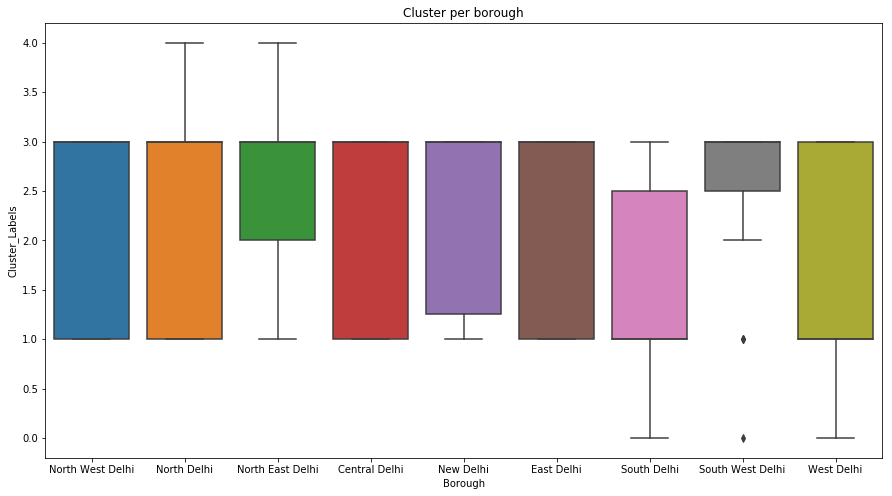

In [131]:
plt.figure(figsize=(15,8))
sns.boxplot(x=DL_merged.Borough, y=DL_merged.Cluster_Labels)
plt.title('Cluster per borough')
plt.show()

In [138]:
DL_merged['Cluster_names'] = DL_merged['Cluster_Labels']
DL_merged['Cluster_names'] = DL_merged['Cluster_names'].replace(0, 'Cafes')

In [139]:
DL_merged['Cluster_names'] = DL_merged['Cluster_names'].replace(1, 'Restaurants')
DL_merged['Cluster_names'] = DL_merged['Cluster_names'].replace(2, 'ATMs')
DL_merged['Cluster_names'] = DL_merged['Cluster_names'].replace(3, 'Multiple Venues')
DL_merged['Cluster_names'] = DL_merged['Cluster_names'].replace(4, 'Parks')
DL_merged

,Borough,Neighbourhood,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster_names
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,1,Indian Restaurant,Bookstore,Women's Store,Food Court,Garden Center,Restaurants
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1,Diner,Indian Restaurant,Health & Beauty Service,Bakery,Women's Store,Restaurants
2,North West Delhi,Azadpur,28.707657,77.175547,3,Pool Hall,Bus Station,Restaurant,Women's Store,Food & Drink Shop,Multiple Venues
3,North West Delhi,Bawana,28.799660,77.032885,3,Playground,Diner,Garden Center,Garden,Gaming Cafe,Multiple Venues
5,North West Delhi,Dhaka,28.708000,77.205500,3,Pizza Place,Diner,Train Station,Furniture / Home Store,Asian Restaurant,Multiple Venues
6,North West Delhi,Jahangirpuri,28.725972,77.162658,3,Light Rail Station,Women's Store,Food Court,Garden Center,Garden,Multiple Venues
8,North West Delhi,Keshav Puram,28.688926,77.161683,3,Department Store,Basketball Court,Bakery,Moving Target,Women's Store,Multiple Venues
9,North West Delhi,Kingsway Camp,28.614262,77.201555,3,Garden,Museum,Women's Store,Diner,Garden Center,Multiple Venues
10,North West Delhi,Kohat Enclave,28.698041,77.140539,1,Snack Place,Indian Restaurant,Light Rail Station,Mobile Phone Shop,Food Court,Restaurants
11,North West Delhi,Model Town,28.709500,77.188800,1,Coffee Shop,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Food & Drink Shop,Restaurants


In [141]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude_DL, longitude_DL], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cluster_name in zip(DL_merged['latitude'], DL_merged['longitude'], DL_merged['Neighbourhood'], DL_merged['Cluster_Labels'], DL_merged['Cluster_names']):
    label = folium.Popup(str(poi) + ' (' + str(cluster_name) + ') ', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [149]:
data_url = 'https://www.census2011.co.in/census/state/districtlist/delhi.html'

population_data = pd.read_html(data_url)
population_data = population_data[0]

In [151]:
population_data.drop(rows=7)

TypeError: drop() got an unexpected keyword argument 'rows'